## Project Name: Zomato Data Analysis

### Project Objective:

- Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget.


- This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.


- Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

Using Zomato dataset we try to find out following questions answer:
   1. Top 3 countries that uses the zomato?
   2. Find maximum number of rating?
   3. Find the country names that have 0 rating restaurants.
   4. Distribution of restaurent across countries?
   5. Find out which currency is used by which country?
   6. Which countries do have online Delivery options and which have not online delivery options?
   7. Create a pie chart for  top 5 cities distribution.
   8. Find the top 10 Cuisines
   9. Which country has cheapest food?
   10. a) Create a tree map for cuisines for India. <br> b. Create a tree map for cuisines for United States.
   11. a) Create a histogram for distribution of votes across India ?<br> b) Create a histogram for distribution of votes across United States ?
   
### Analysis Involve Phases:
1. Data collection
2. Data Cleaning & Preparation
3. Data Analysis

## Phase 1. Data Collection
We are using two datasets:
1. Zomato dataset which include restaurant information along with its ratings details which is taken from Kaggle.
2. Country dataset that helps us to add country information from its country code from Zomato dataset.

In [35]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [36]:
# Zomato dataset
df=pd.read_csv('zomato.csv')

In [37]:
# Country code dataset
df_country=pd.read_excel('Country-Code.xlsx')

In [38]:
# Merge two datasets on Country_Code column
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [39]:
# Created a dictionary for Currency Exchange data
currency_exchange_data={'Country':['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
     'exchange_rate_in_US_dollar':[0.018,0.19,1,0.66,0.73,0.74,0.27,0.012,0.000065,0.612,1.18,0.2733,0.054,0.0030,0.0053]}

In [40]:
currency_exchange_df=pd.DataFrame(currency_exchange_data)

In [41]:
currency_exchange_df.head()

,Country,exchange_rate_in_US_dollar
0,Phillipines,0.018
1,Brazil,0.190
2,United States,1.000
3,Australia,0.660
4,Canada,0.730


In [42]:
final_df=pd.merge(final_df,currency_exchange_df,on='Country',how='left')

## Phase 2. Data Cleaning & Preparation

#### Fix dataframe column names


In [43]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'exchange_rate_in_US_dollar'],
      dtype='object')

In [44]:
final_df = final_df.rename(columns={'Restaurant ID':'restaurant_id', 
                         'Restaurant Name': 'restaurant_name', 
                         'Country Code': 'country_code', 
                         'City': 'city', 
                         'Address': 'address',
                         'Locality': 'locality', 
                         'Locality Verbose': 'locality_verbose', 
                         'Longitude':'longitude', 
                         'Latitude': 'latitude', 
                         'Cuisines': 'cuisines',
                         'Average Cost for two': 'average_cost_for_two', 
                         'Currency':'currency', 
                         'Has Table booking': 'has_table_booking',
                         'Has Online delivery': 'has_online_delivery', 
                         'Is delivering now': 'is_delivering_now', 
                         'Switch to order menu':'switch_to_order_menu',
                         'Price range': 'price_range', 
                         'Aggregate rating': 'aggregate_rating', 
                         'Rating color': 'rating_color', 
                         'Rating text': 'rating_text',
                         'Votes': 'votes', 
                         'Country': 'country'
                        })

In [45]:
final_df.describe()

,restaurant_id,country_code,longitude,latitude,average_cost_for_two,price_range,aggregate_rating,votes,exchange_rate_in_US_dollar
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,0.076139
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,0.237351
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000065
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,0.012000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,0.012000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,0.012000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,1.180000


In [46]:
final_df.shape

(9551, 23)

### Observation: 
1. restaurant_id: 
- Unique id for each restaurant across various cities of the world
- Also this column is Primary key column in table.

2. restaurant_name:
- Restaurant name belongs to its id.

3. country_code:
- Code for each country.
- Country in which restaurant is located
- There are total 15 unique country codes in this dataset.

4. city:
- City in which restaurants are located.
- There are total 141 cities restaurant data into the dataset.

4. address:
- Address of restaurants.

5. locality
- Locality of restaurants in that city.
- There are total 1208 unique localities data into the dataset.

6. locality_verbose
- Represents detailed description of the locality
- We can drop  either 'locality' or 'locality_verbose' columns as it contains similar information.
 
7. longitude
- Represents geographical longitude coordinate of the restaurant’s location.

8. latitude
- Represents geographical latitude coordinate of the restaurant’s location.

9. cuisines
- Represents different types of Cusines offered by the restaurants.
- There are total 1825 unique cuisines.
- There are total 9 null values in cuisines, means restaurant cusinies information is not available.

10. average_cost_for_two
- Represents average cost for 2 persons in local currency.

11. currency
- Represents Currency of every country
- There are 12 unique currency

12. has_table_booking
- Represents whether the restaurant has table booking or not.
- It is boolean datatype 

13. has_online_delivery
- Represents whether the restaurent has online delivery option or not.
- It is boolean datatype

14. is_delivering_now
- Represents whether the restaurent will be able to deliver at specific timing.
- It is boolean datatype

15. switch_to_order_menu
- It is boolean data type
- It has 9551 No records
- We can drop this column as it doesn't contain any informative information in further analysis.

16. price_range
- represents range of price of food.
- There are total 4 unique values in price range.
- It is a array which contains [1,2,3,4].

17. aggregate_rating
- Represents rating of restaurant out of 5.
- There are toatal 33 unique values in aggregate_rating.
 
18. rating_color
- There are total 6 unique rating colour with respect to aggregate rating column.
- Represents colour to specific range  with reference to aggregate_rating column.

19. rating_text
- there are total 6 unique rating text with respect to aggregate rating column.
- represents rating text of restaurant

20. votes 
- Represents number of ratings given to specific restaurant.

21. country
- Represents country of restaurant.
- There are total 15 unique countries in the dataset.


In [47]:
final_df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country,exchange_rate_in_US_dollar
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,0.018
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,0.018
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,0.018
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,0.018
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,0.018


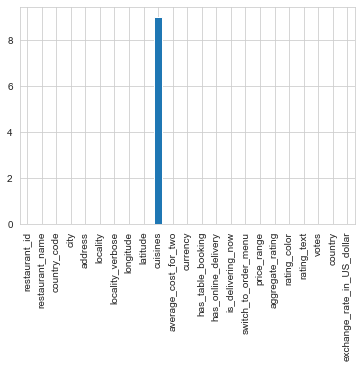

In [48]:
# Check which columns have null values graphically
(final_df.isnull().sum()).plot.bar()
rcParams['figure.figsize'] = 5,5

### Observation:
- Data is almost clean.
- We have 9 null values into Cuisines columns.
- As this columns doesn't effect other column values hence we are keeping as it's.

## Data Analysis

#### Q.1 Top 3 countries that uses the zomato?

In [49]:
country_names = final_df.country.value_counts().index[:3]

In [50]:
country_val = final_df.country.value_counts().values[:3]

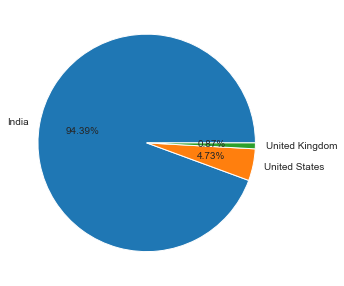

In [51]:
graph=plt.pie(country_val,labels=country_names,autopct='%1.2f%%')

### Observation --to do
- As per the dataset:
- Maximum number of transctions is in India
- Zomato dataset maximum records are from India followed by USA and United Kingdom.

 #### Q.2 Find maximum number of rating?

In [19]:
ratings = final_df.groupby(['aggregate_rating','rating_color','rating_text']).size().reset_index().rename(columns={0:'rating_count'})

In [20]:
ratings

,aggregate_rating,rating_color,rating_text,rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation

- When rating is between:
    - 4.5 to 4.9  ---> Excellent
    - 4.0 to 4.4  ---> Very good
    - 3.5 to 3.9  ---> Good
    - 2.5 to 3.4  ---> Average
    - 1.8 to 2.4  ---> Poor


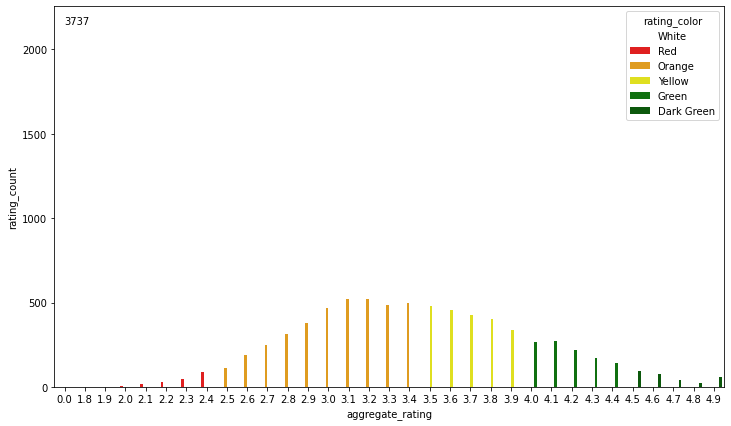

In [21]:
plt.figure(figsize=(12,7))
palette_colour = ["White","Red","Orange","Yellow","Green","DarkGreen"]
ax = sns.barplot(x="aggregate_rating", y="rating_count",hue="rating_color",data=ratings, palette = palette_colour)
for p, label in zip(ax.patches, final_df["rating_color"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

# Observations:

- As labeled in graph - 3737 restaurants didn't have any rating.
- Rating shows normal distribution i.e. the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center.
- Maximum number restaurants are average rated i.e. between 3 to 3.5.


#### Q.3.Find the country names that have 0 rating restaurants.

In [22]:
country_name = final_df[final_df.aggregate_rating.isin([0.0])].country.value_counts().index
restaurant_count = final_df[final_df.aggregate_rating.isin([0.0])].country.value_counts().values

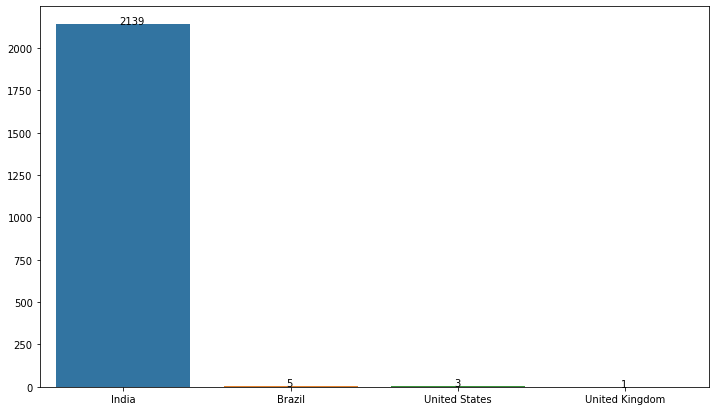

In [23]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=country_name, y=restaurant_count)
for p, label in zip(ax.patches, restaurant_count):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

#### Obseravations:
- Maximum number 0 rated restaurants are from India i.e. 2139 restaurants.
- However only few restaurants are from other countries in which 5 are in Brazil, 3 in United States and 1 in United Kingdom.

#### Q.4 Distribution of restaurents across countries?

In [24]:
order=final_df.country.value_counts().index

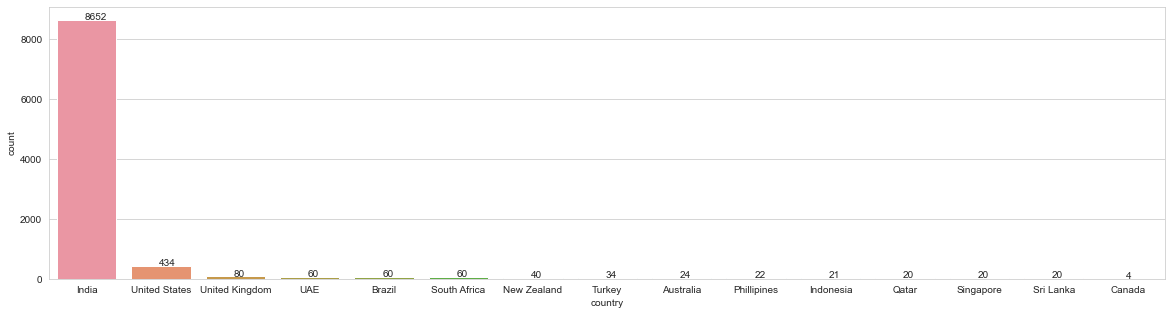

In [25]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
ax=sns.countplot(x='country',data=final_df,order = order)

for p, label in zip(ax.patches, final_df["country"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

#### Observation:  - to do
- Dataset consist maximum number of restaurants records are from India i.e almost 90% followed by United States and United Kingdom.

#### Q.5 Find out which currency is used by which country?

In [26]:
final_df[['country','currency']].groupby(['country','currency']).size().reset_index()[['country','currency']]

,country,currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


#### Q.6. Which countries do have online Delivery options and which have not online delivery options??

In [27]:
final_df[final_df["has_online_delivery"]=="Yes"].country.value_counts()

India    2423
UAE        28
Name: country, dtype: int64

In [28]:
final_df[['has_online_delivery','country']].groupby(['has_online_delivery','country']).size().reset_index()

,has_online_delivery,country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


#### Observation: 
- Indian and UAE restaurants only have Online Delivery options in this dataset.

#### Q.7 Create a pie chart for  top 5 cities distribution.

In [29]:
city_values=final_df.city.value_counts().values[:5]
city_labels=final_df.city.value_counts().index[:5]

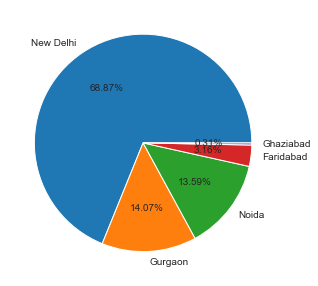

In [31]:
graph=plt.pie(city_values,labels=city_labels,autopct='%1.2f%%')

### Observation
- New Delhi has maximum number of restaurants followed by Gurgoan and Noida.

 #### Q.8. Find the top 10 Cuisines

In [32]:
cuisines_values=final_df.cuisines.value_counts().values
cuisines_labels=final_df.cuisines.value_counts().index

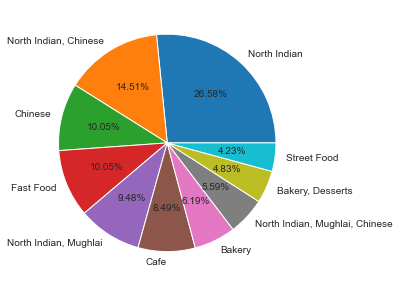

In [33]:
plt = plt.pie(cuisines_values[:10],labels=cuisines_labels[:10],autopct='%1.2f%%')

### Observation
- North Indian food dominates the Indian taste buds,because majority of the restaurents are based out of North India(Previous graph).
- North Indian,Chinese,Fast food,Mughlai are few popular cuisines in India.

#### Q.9. Which country has cheapest food?

In [43]:
# Converting all cost into one currency i.e. in US dollars.
final_df['average_cost_for_two_in_US_dollars']=final_df['average_cost_for_two']*final_df['exchange_rate_in_US_dollar']

<AxesSubplot:xlabel='average_cost_for_two_in_US_dollars', ylabel='country'>

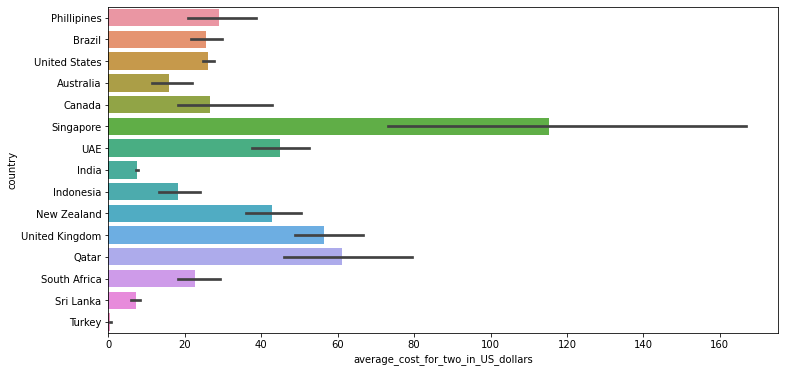

In [44]:
sns.barplot(x="average_cost_for_two_in_US_dollars", y="country", data=final_df)

 #### Observation:
 India has the cheapest average cost for 2 persons, followed by Sri Lanka and Indonesia.

#### Q.10 a) Create a tree map for cuisines for India 


In [45]:
cuisines_values=final_df[final_df.country.isin(['India'])].cuisines.value_counts().values[:12]
cuisines_labels=final_df[final_df.country.isin(['India'])].cuisines.value_counts().index[:12]


(0.0, 100.0, 0.0, 100.0)

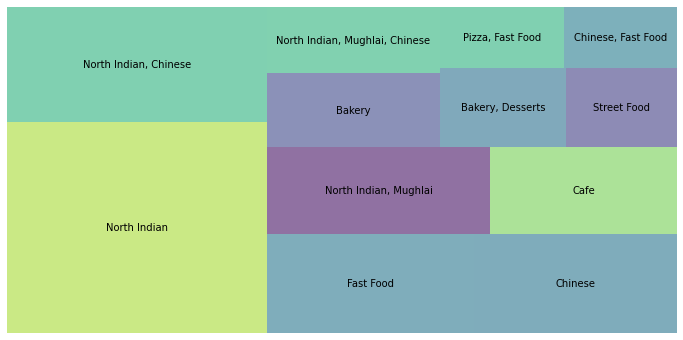

In [46]:
import squarify
squarify.plot(sizes=cuisines_values,label=cuisines_labels,alpha=0.6)
plt.axis('off')

#### Observation:
North Indian,Chinese,Fast food, Mughlai are few popular cuisines in India.

#### Q.10 b) Tree map for Cuisines for United States

In [47]:
cuisines_values=final_df[final_df.country.isin(['United States'])].cuisines.value_counts().values[:12]
cuisines_labels=final_df[final_df.country.isin(['United States'])].cuisines.value_counts().index[:12]

(0.0, 100.0, 0.0, 100.0)

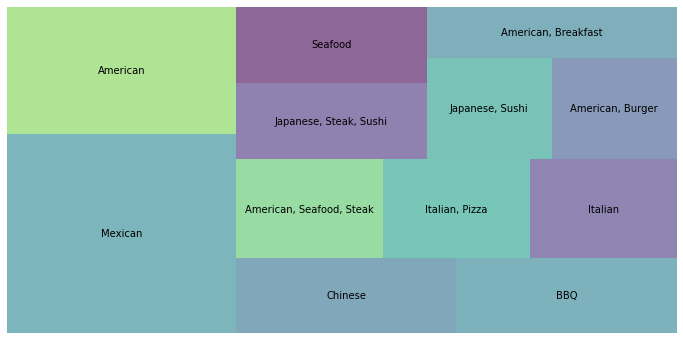

In [48]:
import squarify
squarify.plot(sizes=cuisines_values,label=cuisines_labels,alpha=0.6)
plt.axis('off')

#### Observation:
- As per this dataset:
- Americans love everything American- steak,seafood, burgers,BBQ apart from Mexican and Chinese food. 
- Popular Indian cuisine is North Indian owing to major North Indian cities and for the USA it’s all Americana food.

#### Q.11 a) Create a histogram for distribution of Votes across India ?

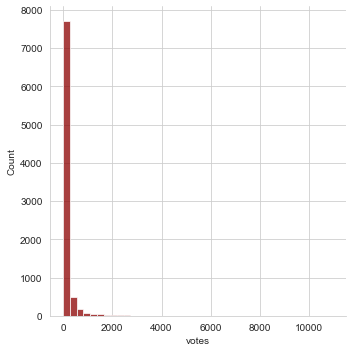

In [100]:
histogram=final_df[final_df.country.isin(['India'])].votes
sns.displot(histogram.dropna(),kde=False,color='darkred',bins=40)

#### Observation:

A major of Indian restaurents ratings are Zero

#### Q.11 b) Create a histogram for distribution of Votes across United States ?

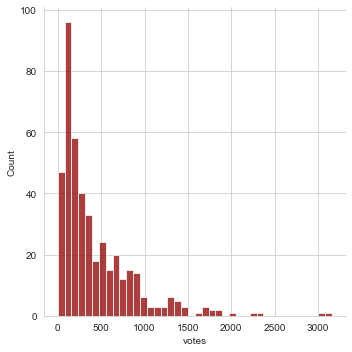

In [101]:
histogram=final_df[final_df.country.isin(['United States'])].votes
sns.displot(histogram.dropna(),kde=False,color='darkred',bins=40)

#### Observation:

- As per dataset:
- USA restaurants have higher ratings compared with Indian restaurants, this could indicate a better service in the US.
- US customers provide ratings more frequently and consistently than Indians.

## Conclusion - Results:
Hence, we successfuly able to find out all following questions answer:
#### Q.1 Top 3 countries that uses the zomato?
- Maximum number of transctions is in India
- Zomato maximum records are from India followed by USA and United Kingdom.

#### Q.2.  Find maximum number of rating?

### Observations:
- When rating is between:
 - 4.5 to 4.9 ---> Excellent
 - 4.0 to 4.4 ---> Very good
 - 3.5 to 3.9 ---> Good
 - 2.5 to 3.4 ---> Average
 - 1.8 to 2.4 ---> Poor

- As labeled in graph - 3737 restaurants didn't have any rating.
- Rating shows normal distribution i.e. the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center.
- Maximum number restaurants are average rated i.e. between 3 to 3.5.

#### Q.3. Find the country names that has given 0 rating

- Maximum number of zero ratings are from Indian customer.
- However only few restaurants are from other countries in which 5 are in Brazil, 3 in United States and 1 in United Kingdom.

#### Q.4 Distribution of restaurent across countries?

- India has largest number of restaurants across countries which consit of 90% followed by United States and United Kingdom.

#### Q.5  Find out which currency is used by which country?

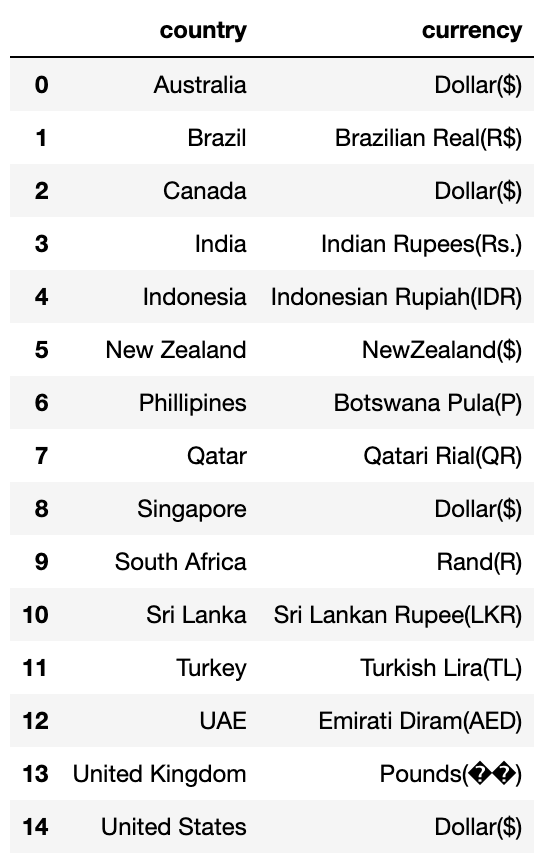

#### Q.6 Which countries do have online Delivery options and which have not online delivery options?

### Observation:
- Indian and UAE restaurants only have Online Delivery options in this dataset.

#### Q.7 Created a pie chart for top 5 cities distribution? 

#### Observation:
- New Delhi has maximum number of restaurants followed by Gurgoan and Noida

#### Q.8 Find the top 10 Cuisines?

#### Observations:
- North Indian food dominates the Indian taste buds,because majority of the restaurents are based out of North India.
- North Indian,Chinese,Fast food,Mughlai are few popular cuisines in India.

#### Q.9. Which country has cheapest food?

#### Observation:
 - India has the cheapest average cost for 2 persons, followed by Sri Lanka and Indonesia.

#### Q.10 a) Create a tree map for cuisines for India 


#### Observation:
- North Indian,Chinese,Fast food, Mughlai are few popular cuisines in India.

#### Q. 10 b) Create a tree map for cuisines for United States

#### Observation:
- Americans love everything American- steak,seafood, burgers,BBQ apart from Mexican and Chinese food. 

### Conclusion:
- Popular Indian cuisine is North Indian owing to major North Indian cities and for the USA it’s all Americana food.

#### Q.11 a) Create a histogram for distribution of votes across India?

#### Observation:
- A major of Indian restaurents ratings are Zero.

#### Q.11 b) Create a histogram for distribution of Votes across United States ?

#### Observations:
- USA restaurants have higher ratings compared with Indian restaurants, this could indicate a better service in the US.
- US customers provide ratings more frequently and consistently than Indians.

### Conclusions

90% of observations belong to India.
